<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOGO/basic_logistic_regression_with_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Hypothesis from linear regression: $z_\theta(x) = \theta_0x_0 + \theta_1x_1 \dots + \theta_nx_n = \theta^Tx$

Logistic hypothesis from composition of sigmoid/logistic function and linear hypothesis:
$$h_\theta(x) = \frac{1}{1 + e^{-z_\theta(x)}} = \frac{1}{1 + e^{-\theta^Tx}}$$

The logistic hypothesis tells us the probability of an $x$ being $1$ for the given $\theta$.
$$h_\theta(x) = P(y = 1 \,|\, x ; \theta) = 1 - P(y = 0 \,|\, x ; \theta)$$

We choose to predict that $y = 1$ when $h_\theta(x) \ge 0.5$. `sigmoid(x)` returns $ \ge 0.5$ for values $x \ge 0$. Thus we can predict $y = 1$ when $\theta^Tx \ge 0$.

We cannot use the cost function from linear regression with this hypothesis since it would produce local minima. Instead given `m` samples:

\begin{align*}
J(\theta) &= \frac{1}{m} \sum_{i=1}^{m} \text{Cost}(h_\theta(x^{(i)}), y^{(i)}) \\
\text{Cost}(h_\theta(x^{(i)}), 1) &= -\log(h_\theta(x)) \\
\text{Cost}(h_\theta(x^{(i)}), 0) &= -\log(h_\theta(1 - x))
\end{align*}

This way we get a higher penalty the further the hypothesis is from `y` no matter if `y` is `1` or `0`.

This can be simplified with a vectorized implementation and with the conditionals removed:

$$
J(\theta) = \frac{1}{m} \dot (-y^{T}\log(h_\theta(x)) - (1 - y)^{T} \log(1 - h_\theta(x)))
$$

In [ ]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))


def z(theta, x):
    assert theta.shape[1] == 1
    assert theta.shape[0] == x.shape[1]  # Theta should have as many rows as x has features.
    return np.dot(x, theta)


def hypothesis(theta, x):
    return sigmoid(z(theta, x))


def cost(theta, x, y):
    assert x.shape[1] == theta.shape[0]  # x has a column for each feature, theta has a row for each feature.
    assert x.shape[0] == y.shape[0]  # One row per sample.
    assert y.shape[1] == 1
    assert theta.shape[1] == 1
    h = hypothesis(theta, x)
    one_case = np.matmul(-y.T, np.log(h))
    zero_case = np.matmul(-(1 - y).T, np.log(1 - h))
    return (one_case + zero_case) / len(x)


def gradient_descent(theta, x, y, learning_rate, regularization = 0):
    regularization = theta * regularization
    error = hypothesis(theta, x) - y
    n = (learning_rate / len(x)) * (np.matmul(x.T, error) + regularization)
    return theta - n


def minimize(theta, x, y, iterations, learning_rate, regularization = 0):
    costs = []
    for _ in range(iterations):
        theta = gradient_descent(theta, x, y, learning_rate, regularization)
        costs.append(cost(theta, x, y)[0][0])
    return theta, costs

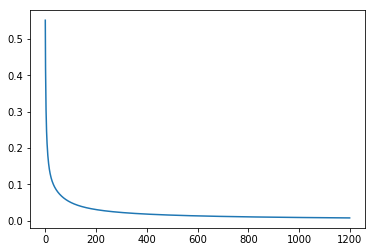

0.00805093718867


0.9983593109105825

In [ ]:
mushroom_data = pd.read_csv("../input/mushrooms.csv").dropna()
mushroom_x = pd.get_dummies(mushroom_data.drop('class', axis=1))
mushroom_x['bias'] = 1
mushroom_x = mushroom_x.values
mushroom_y = (np.atleast_2d(mushroom_data['class']).T == 'p').astype(int)

x_train, x_test, y_train, y_test = train_test_split(mushroom_x, mushroom_y, train_size=0.85, test_size=0.15)
candidate = np.atleast_2d([ np.random.uniform(-1, 1, 118) ]).T
theta, costs = minimize(candidate, x_train, y_train, 1200, 1.2, 0.5)
plt.plot(range(len(costs)), costs)
plt.show()
print(costs[-1])

predictions = x_test.dot(theta) > 0
len(list(filter(lambda x: x[0] == x[1], np.dstack((predictions, y_test))[:,0]))) / len(predictions)